<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/DESNumericalIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Equations and Numerical Integration

## Juan C. Reyes
## Jan 21. 2020
### Neurocomputing & Theoretical Neuroscience 
###Dalhousie University 


The aim of this notebook is to study the time evolution of differential equations by employing numerical integration techniques. We will also test the accuracy of our methods by comparing the numeric results to the well known analytic solutions.

In particular, differential equations have proven very valuable in the natural sciences by allowing scientists to model a wide variety of natural phenomena ranging from planetary motion to the propagation of axon potentials in neurons by applying techniques from differential calculus.

## Initial Value Problems

An ordinary differential equation is an equation that expresses some relationships between derivatives $f'(x)$ and an unknown function $f(x)$ for only one independent variable x. Equations involving two or more independent variables are called *partial differential equations*

Let's take a look at a simple type of differential equation:

$\frac{dx}{dt} = f(x,t)$

This is known as a first order differential equation relating a first order derivative $\frac{dx(t)}{dt}$ to a function $f(x,t)$. In particular, we are interested in determining the quantity $x(t)$ which satisfies the relation given above for any values of $t>t_{0}$ given that the initial state of the system $x(t_{0})$ is known.  

Problems of this type are known as *initial value problems*.

## Linear Differential Equations

Consider a linear differential equation given by the following form:

$\frac{dx}{dt} + P(t)x = Q(t)$

We can seek a solution by multiplying both sides of the equation by an *integrating factor* $J(t)$. 

$J \frac{dx}{dt} + JPx = JQ$

such that the following relationship holds:

$\frac{d}{dt}(Jx) = J\frac{dx}{dt} + x\frac{dJ}{dt} = JQ$.

To achieve this, we set
$\frac{dJ}{dt} = JP$ and integrate this to get 


$J(t) = e^{\int P(t)dt}$.

Thus, to solve the linear differential equation we can instead solve the differential equation
$\frac{d}{dt}(Jx) = JQ$

## Example:

$\frac{dx}{dt} = 1 - x(t) + t$, where $x(t=0) = 1$.

To solve this, realize that the type of differential equation is linear by rewriting it as 

$\frac{dx}{dt} + x(t) = 1+ t$ 

where $P(t)=1$ and $Q(t)= 1+t$.

We begin by finding the integrating factor

$J(t) = e^{\int P(t) dt} = e^{\int 1 dt} = e^{t}$

Multiplying our equation on both sides by the integrating factor allows us to write

$e^{t}\frac{dx}{dt} + e^{t}x(t) = e^{t}(1+t)$

Noting the left hand side can be rewritten by reversing the product rule gives

$\frac{d}{dt}(e^{t}x(t)) = e^{t}(1+t)$

Integrating yields:

$\int \frac{d}{dt}(e^{t}x(t))dt = \int e^{t}(1+t)dt$ 

$e^{t}x(t) = \int e^{t}(1+t)dt = \int e^{t}dt+ \int te^{t}dt$

$e^{t}x(t) = e^{t}+ \int te^{t}dt$ 

Integrating the remaining integral by parts:

$\int udv = uv - \int vdu$

Let $u=t$ and $dv = e^{t}$ and so

$du = dt$ and $v=e^{t}$.

We obtain:

$e^{t}x(t) = e^{t}+ te^{t} -\int e^{t}dt$ 

$e^{t}x(t) = e^{t}+ te^{t} -e^{t} + C_{1}$

$e^{t}x(t) = te^{t} + C_{1}$

$x(t) = t + e^{-t}C_{1}$

Applying our initial condition $x(t=0) = 1$ gives,

$x(t=0) = (0) + e^{0}C_{1}$ = 1

And so,

$C_{1} = 1$.

Giving an analytic solution to our differential equation as

$x(t) = t + e^{-t}$











# Numerical Integration

We will implement an Euler Method to discretize our differential equation and approximate our solutions numerically. 

We begin by importing the necessary packages to perform the integration as well as to visualize the data

In [0]:
from scipy.integrate import odeint #integrate function
from pylab import *
from matplotlib.pyplot import * #visualization library
import matplotlib.style as style 
style.use('seaborn-darkgrid')
import numpy as np

## 1) Define the function to integrate

In [0]:
def f(x,t):
    dxdt = 1 - x + t
    return dxdt

## 2) Define initial condition as well as time step values


In [0]:
x0 = 1.0 #initial condition at t=0
dt = 0.2 #time step
t = np.linspace(0,4,int(4/dt)+1) #time range from 0 to 4.
x_euler=np.array([x0]) #initialize array to store time evolution

## 3) Apply Euler method to determine time evolution

In [0]:
for t_step in t: #loop through all time values
  x_euler = np.append(x_euler,x_euler[-1]+f(x_euler[-1],t_step)*dt) #store time evolution calculated using the Euler method

## 4) Visualize Results

Begin by graphing our results from our numerical integration:

Text(0.5, 1.0, 'Euler Method Integration Results')

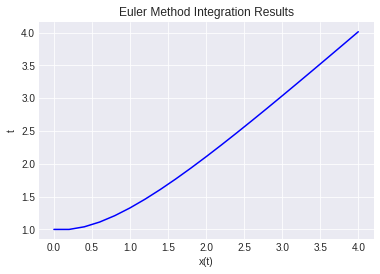

In [89]:
plt.plot(t,x_euler[0:-1],color='b') #plot solutions vs time.
plt.xlabel("x(t)") #Label Axes
plt.ylabel("t")
plt.title("Euler Method Integration Results")

Now lets visualize our results from the analytic solution obtained before: $x(t) = t + e^{-t}$

Text(0.5, 1.0, 'Analytic Solution')

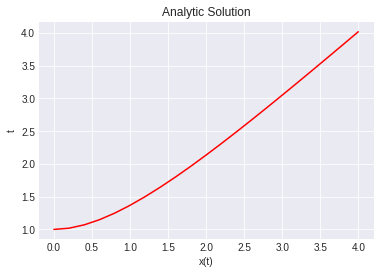

In [90]:
analyticx =  t+np.exp(-t)
plot(t,analyticx ,color='r')
plt.xlabel("x(t)") #Label Axes
plt.ylabel("t")
plt.title("Analytic Solution")

We may also compare our results from the integration performed by the scipy.integrate function.

Text(0.5, 1.0, 'scipy.integrate Integration Results')

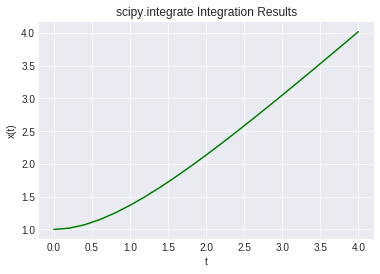

In [91]:
sol = odeint(f,x0,t) #Use scipy.integrate to perform the integration
plt.plot(t,sol,color='g')
plt.xlabel("t") #Label Axes
plt.ylabel("x(t)")
plt.title("scipy.integrate Integration Results")

Lets visualize them all together now and plot their respective errors relative to the analytic solution:

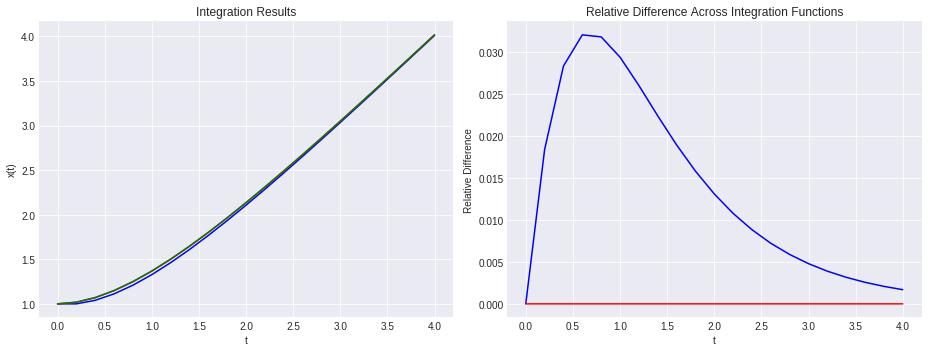

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 5)) #create subplots and set figure size
ax1.plot(t,x_euler[0:-1],color='b') #Plot integration results on the first plot 
ax1.plot(t, analyticx, color='r')
ax1.plot(t,sol,color='g')
ax1.set(xlabel='t',ylabel='x(t)',title="Integration Results") #Set labels

ax2.plot(t,(analyticx -x_euler[0:-1])/analyticx ,color='b')
ax2.plot(t,(analyticx - sol[:,0])/analyticx ,color='r')
ax2.set(xlabel='t',ylabel='Relative Difference',title="Relative Difference Across Integration Functions")

plt.tight_layout()